# CLaP Exmaple Visualization
In this notebook, we visualize the workflow of CLaP.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import sys

sys.path.append("../../")

import numpy as np

from src.utils import load_datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from src.clap import CLaP

sns.set_theme()
sns.set_color_codes()

/Users/ermshaua/miniconda3/envs/clap/lib/python3.9/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Let's first load the data and select a TS.

In [3]:
df_data = load_datasets("SKAB")
df_data

,dataset,window_size,change_points,labels,time_series
0,SKAB_valve1_0,95,"[573, 974]","[0, 1, 0]","[[0.0265878, 0.0401113, 1.3302, 0.054711, 79.3..."
1,SKAB_valve1_1,95,"[572, 974]","[0, 1, 0]","[[0.0270797, 0.039615, 0.871339, 0.054711, 75...."
2,SKAB_valve1_2,95,"[566, 903]","[0, 1, 0]","[[0.0269897, 0.0404067, 1.01551, 0.382638, 72...."
3,SKAB_valve1_3,95,"[573, 977]","[0, 1, 0]","[[0.0273043, 0.0402794, 1.28881, 0.054711, 72...."
4,SKAB_valve1_4,95,"[573, 922]","[0, 1, 0]","[[0.0274316, 0.0403781, 0.822886, -0.273216, 7..."
5,SKAB_valve1_5,95,"[577, 980]","[0, 1, 0]","[[0.0271829, 0.040024, 0.91393, 0.054711, 70.9..."
6,SKAB_valve1_6,95,"[576, 981]","[0, 1, 0]","[[0.0274287, 0.0403526, 0.77031, 0.382638, 71...."
7,SKAB_valve1_7,95,"[578, 983]","[0, 1, 0]","[[0.0280305, 0.0403998, 1.18285, 0.054711, 69...."
8,SKAB_valve1_8,95,"[572, 972]","[0, 1, 0]","[[0.0273695, 0.039925, 0.837048, 0.382638, 70...."
9,SKAB_valve1_9,95,"[574, 976]","[0, 1, 0]","[[0.0272946, 0.0420143, 0.814746, 0.382638, 69..."


In [4]:
idx = 12  
data_row = df_data.iloc[idx]

Now, we plot how the TS is transformed by CLaP.

In [5]:
np.random.seed(2357)

time_series = data_row.time_series[:, 7]

# Sub-select TS
time_series = time_series[200:]  
change_points = data_row.change_points - 200  
labels = data_row.labels  
window_size = 20

# Create CLaP
clap = CLaP()
clap.window_size = window_size

X, y = clap._create_dataset(time_series.reshape(-1, 1), change_points, np.arange(labels.shape[0]))
y_true, y_pred = clap._cross_val_classifier(X, y)
score = f1_score(y_true, y_pred, average="macro")
gain = clap._classification_gain(y_true, y_pred)

y_true_merged, y_pred_merged = y_true.copy(), y_pred.copy()
y_true_merged[y_true == 2] = 0
y_pred_merged[y_pred == 2] = 0

score_merged = f1_score(y_true_merged, y_pred_merged, average="macro")
gain_merged = clap._classification_gain(y_true_merged, y_pred_merged)

<Figure size 640x480 with 0 Axes>

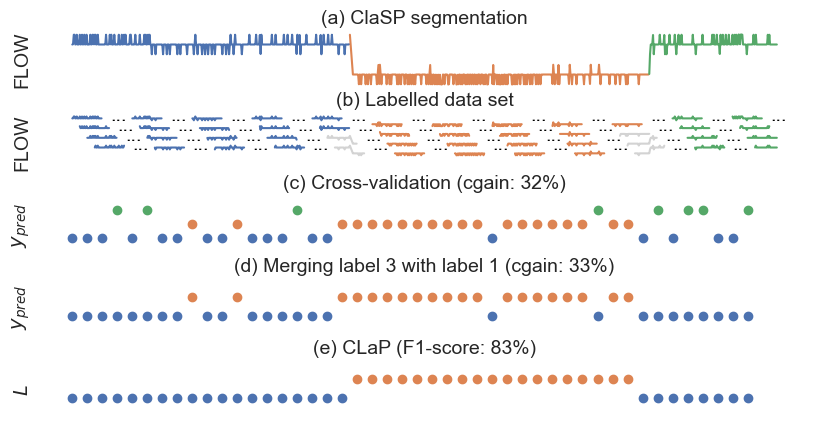

In [6]:
plt.clf()

font_size = 14
n_windows = int(time_series.shape[0] / (2 * window_size))

fig, axes = plt.subplots(
    5,
    sharex=True,
    gridspec_kw={'hspace': .5},
    figsize=(10, 5)
)

### Plots TS ###
segments = [0] + change_points.tolist() + [time_series.shape[0]]

for idx in np.arange(0, len(segments) - 1):
    axes[0].plot(
        np.arange(segments[idx], segments[idx + 1]),
        time_series[segments[idx]:segments[idx + 1]],
        c=f"C{idx}"
    )

axes[0].set_ylabel("FLOW", fontsize=font_size)

### Plots windows ###
for idx in np.arange(0, time_series.shape[0], 4 * window_size):
    x1, x2, = idx, min(idx + 2 * window_size, time_series.shape[0])

    for idxoff, x_offset in enumerate(np.arange(0, 2, .5)):
        x_offset = int(x_offset * window_size)
        x3, x4 = x1 + x_offset, min(x2 + x_offset, time_series.shape[0])
        subsequence = time_series[x3:x4]
        y_offset = time_series.max() - time_series.min()

        excluded = True

        for seg_idx in range(len(segments) - 1):
            start_idx, end_idx = segments[seg_idx], segments[seg_idx + 1]

            if x3 >= start_idx and x4 <= end_idx:
                axes[1].plot(np.arange(x3, x4), subsequence - y_offset * idxoff, c=f"C{seg_idx}")
                excluded = False
                break

        if excluded is True:
            axes[1].plot(np.arange(x3, x4), subsequence - y_offset * idxoff, c="lightgrey")

        if x3 + int(2.5 * window_size) < time_series.shape[0]:
            axes[1].text(x3 + int(2.5 * window_size), time_series.mean() - y_offset * idxoff, "...", fontsize=font_size,
                         c="black")

axes[1].set_yticks(np.arange(time_series.mean() - y_offset * (idxoff + 2), time_series.max(), 10))
axes[1].set_ylabel("FLOW", fontsize=font_size)

### Plots cross-validation ###
for kdx, label in enumerate(y_pred):
    if kdx % 2 == 0:
        axes[2].scatter(kdx * clap.window_size // 2, label, c=f"C{label}")

axes[2].set_yticks(np.arange(-1, 3, .1))
axes[2].set_ylabel("$y_{pred}$", fontsize=font_size)

### Plots merge ###
for kdx, label in enumerate(y_pred_merged):
    if kdx % 2 == 0:
        axes[3].scatter(kdx * clap.window_size // 2, label, c=f"C{label}")

axes[3].set_yticks(np.arange(-1, 2, .1))
axes[3].set_ylabel("$y_{pred}$", fontsize=font_size)

### Plots CLaP ###
for kdx, label in enumerate(y_true_merged):
    if kdx % 2 == 0:
        axes[4].scatter(kdx * clap.window_size // 2, label, c=f"C{label}")

axes[4].set_yticks(np.arange(-1, 2, .1))
axes[4].set_ylabel("$L$", fontsize=font_size)

ax_titles = [
    "(a) ClaSP segmentation",
    "(b) Labelled data set",
    f"(c) Cross-validation (cgain: {int(gain * 100)}%)",
    f"(d) Merging label 3 with label 1 (cgain: {int(gain_merged * 100)}%)",
    f"(e) CLaP (F1-score: {int(score_merged * 100)}%)"
]

# Adjust axes style
for idx, ax in enumerate(axes):
    ax.set_title(ax_titles[idx], fontsize=font_size)
    ax.set_facecolor((1., 1., 1.))

    ax.tick_params(
        axis='both',
        which='both',
        labelbottom=False,
        labelleft=False
    )

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(font_size)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(font_size)

plt.savefig("../../figures/clap_workflow.pdf", bbox_inches="tight")